# Bank Marketing Classification Analysis

## Overview

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. We will be building a classification model to analyze the binary customer behavior (yes — subscribed or no — did not subscribe). The bank would then be able to use the same model to predict customer responses to future marketing initiatives.

## Approach

I used OSEMN Framework (Obtain-Scrub-Explore-Model-Interpret), which is one of the most common ways of doing analysis and building predictive models.

### Goal

The goal is to identify clients that would subscribe to the term deposit. To evaluate my model, i will be using precision metrics.

## Data Description:


- <b>age</b> (numeric)

- <b>job</b> : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

- <b>marital</b> : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

- <b>education</b> (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

- <b>default</b>: has credit in default? (categorical: 'no','yes','unknown'
                                    
- <b>housing</b>: has housing loan? (categorical: 'no','yes','unknown')
                                     
- <b>loan</b>: has personal loan? (categorical: 'no','yes','unknown'))

- <b>contact</b>: contact communication type (categorical: 'cellular','telephone')
    
- <b>month</b>: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    
- <b>day_of_week</b>: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    
- <b>duration</b>: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

- <b>campaign</b>: number of contacts performed during this campaign and for this client (numeric, includes last contact)

- <b>pdays</b>: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

- <b>previous</b>: number of contacts performed before this campaign and for this client (numeric)

- <b>poutcome</b>: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

- <b>emp.var.rate</b>: employment variation rate - quarterly indicator (numeric)

- <b>cons.price.idx</b>: consumer price index - monthly indicator (numeric)

- <b>cons.conf.idx</b>: consumer confidence index - monthly indicator (numeric)
    
- <b>euribor3m</b>: euribor 3 month rate - daily indicator (numeric)

- <b>nr.employed</b>: number of employees - quarterly indicator (numeric)

- <b>y</b> - has the client subscribed a term deposit? (binary: 'yes','no')


 source of the dataset: https://archive.ics.uci.edu/ml/datasets/bank+marketing

## Obtain

Our first step is to import all the necessary packages and load the dataframe.

In [1]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels as sm 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, plot_confusion_matrix, classification_report 
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


import warnings
warnings.filterwarnings("ignore")

In [2]:
#load the dataframe
bank_df = pd.read_csv('./Data/bank-additional-full.csv',sep=';')

In [3]:
# Preview first five rows of our data
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# check the shape of the dataframe
bank_df.shape

(41188, 21)

In [5]:
#check the columns
list(bank_df.columns)

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

## Scrub

Next process is Scrub. In this step we check for the missing values and clean the dataset.

In [6]:
#info
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Explore the summary statistics of the dataset.

In [7]:
# Explore the dataset
bank_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


checking for Null values in the dataset

In [8]:
#checking for Null values 
bank_df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Check for the unique values in the target variable 'y'

In [9]:
#checking for unique value in target variable
bank_df['y'].unique()

array(['no', 'yes'], dtype=object)

convert the target column y to numerical data 0 for 'no' and 1 for 'yes'

In [10]:
#converting the target column to binary value 0 and 1
for i in range (len(bank_df.y)):
    if bank_df.y[i] == 'no':
        bank_df.y[i] = 0
    else:
        bank_df.y[i] = 1
        
bank_df.y.unique()            

array([0, 1], dtype=object)

And how many 'yes' customers do we actually have?

In [11]:
bank_df.y.sum()

4640

An 11.3% Sucess rate on a phone marketing campaign is very reasonable.

In [12]:
#checking for unique value in job column
list(bank_df['job'].unique())

['housemaid',
 'services',
 'admin.',
 'blue-collar',
 'technician',
 'retired',
 'management',
 'unemployed',
 'self-employed',
 'unknown',
 'entrepreneur',
 'student']

Data has unknown values and instead of replacing, keeping them to check how model performs.

In [13]:
print(len(bank_df[bank_df['job'] == 'unknown']) / len(bank_df))


0.008012042342429833


In [14]:
# checking for unique value in housing column
bank_df['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [15]:
len(bank_df[bank_df['housing'] == 'unknown']) / len(bank_df)

0.0240361270272895

In [16]:
#checking for unique value in default column
bank_df['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [17]:
len(bank_df[bank_df['default'] == 'unknown']) / len(bank_df)

0.20872584247839177

In [18]:
bank_df['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

(array([ 1515.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 39673.]),
 array([  0. ,  99.9, 199.8, 299.7, 399.6, 499.5, 599.4, 699.3, 799.2,
        899.1, 999. ]),
 <BarContainer object of 10 artists>)

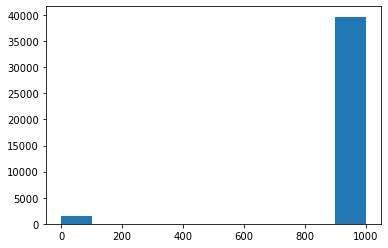

In [19]:
fig, ax = plt.subplots()
# plot histogram
ax.hist(bank_df['pdays'])


[(0.0, 100.0), (0.0, 10000.0)]

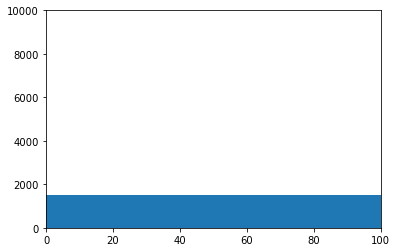

In [20]:

fig, ax = plt.subplots()
# plot histogram
ax.hist(bank_df['pdays'])
ax.set(xlim=(0, 100), ylim=(0, 10000))

In [21]:
#check for the info
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Now lets select the categorical variable and continuous variable

In [22]:
# selecting the numeric and categorical variable
cat_feat = bank_df.select_dtypes(include = 'object')
con_feat = bank_df.select_dtypes(include = ['int64', 'float64'])

Generating dummy variables for the categorical columns

In [23]:
#Generating numeric value for categorical variable
ohe = OneHotEncoder(drop='first', sparse=False)
cat_ohe = ohe.fit_transform(cat_feat)
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names())
cat_ohe.head()

,x0_blue-collar,x0_entrepreneur,x0_housemaid,x0_management,x0_retired,x0_self-employed,x0_services,x0_student,x0_technician,x0_unemployed,...,x7_nov,x7_oct,x7_sep,x8_mon,x8_thu,x8_tue,x8_wed,x9_nonexistent,x9_success,x10_1
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


Joining continuous and categorical columns

In [24]:
#concatenating continuous and categorical columns 
df = pd.concat([con_feat, cat_ohe], axis = 1)

In [25]:
#Check the column 
list(df.columns)

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'x0_blue-collar',
 'x0_entrepreneur',
 'x0_housemaid',
 'x0_management',
 'x0_retired',
 'x0_self-employed',
 'x0_services',
 'x0_student',
 'x0_technician',
 'x0_unemployed',
 'x0_unknown',
 'x1_married',
 'x1_single',
 'x1_unknown',
 'x2_basic.6y',
 'x2_basic.9y',
 'x2_high.school',
 'x2_illiterate',
 'x2_professional.course',
 'x2_university.degree',
 'x2_unknown',
 'x3_unknown',
 'x3_yes',
 'x4_unknown',
 'x4_yes',
 'x5_unknown',
 'x5_yes',
 'x6_telephone',
 'x7_aug',
 'x7_dec',
 'x7_jul',
 'x7_jun',
 'x7_mar',
 'x7_may',
 'x7_nov',
 'x7_oct',
 'x7_sep',
 'x8_mon',
 'x8_thu',
 'x8_tue',
 'x8_wed',
 'x9_nonexistent',
 'x9_success',
 'x10_1']

## Explore

Next process is to explore the given dataset. plot the graph for categorical variable and look into the heatmap.

In [26]:
# selecting categorical column for plotting
categorical_df=bank_df[['job','marital','education','housing', 'loan','contact','month','day_of_week', 'campaign', 'poutcome']]

Plotting categorical columns

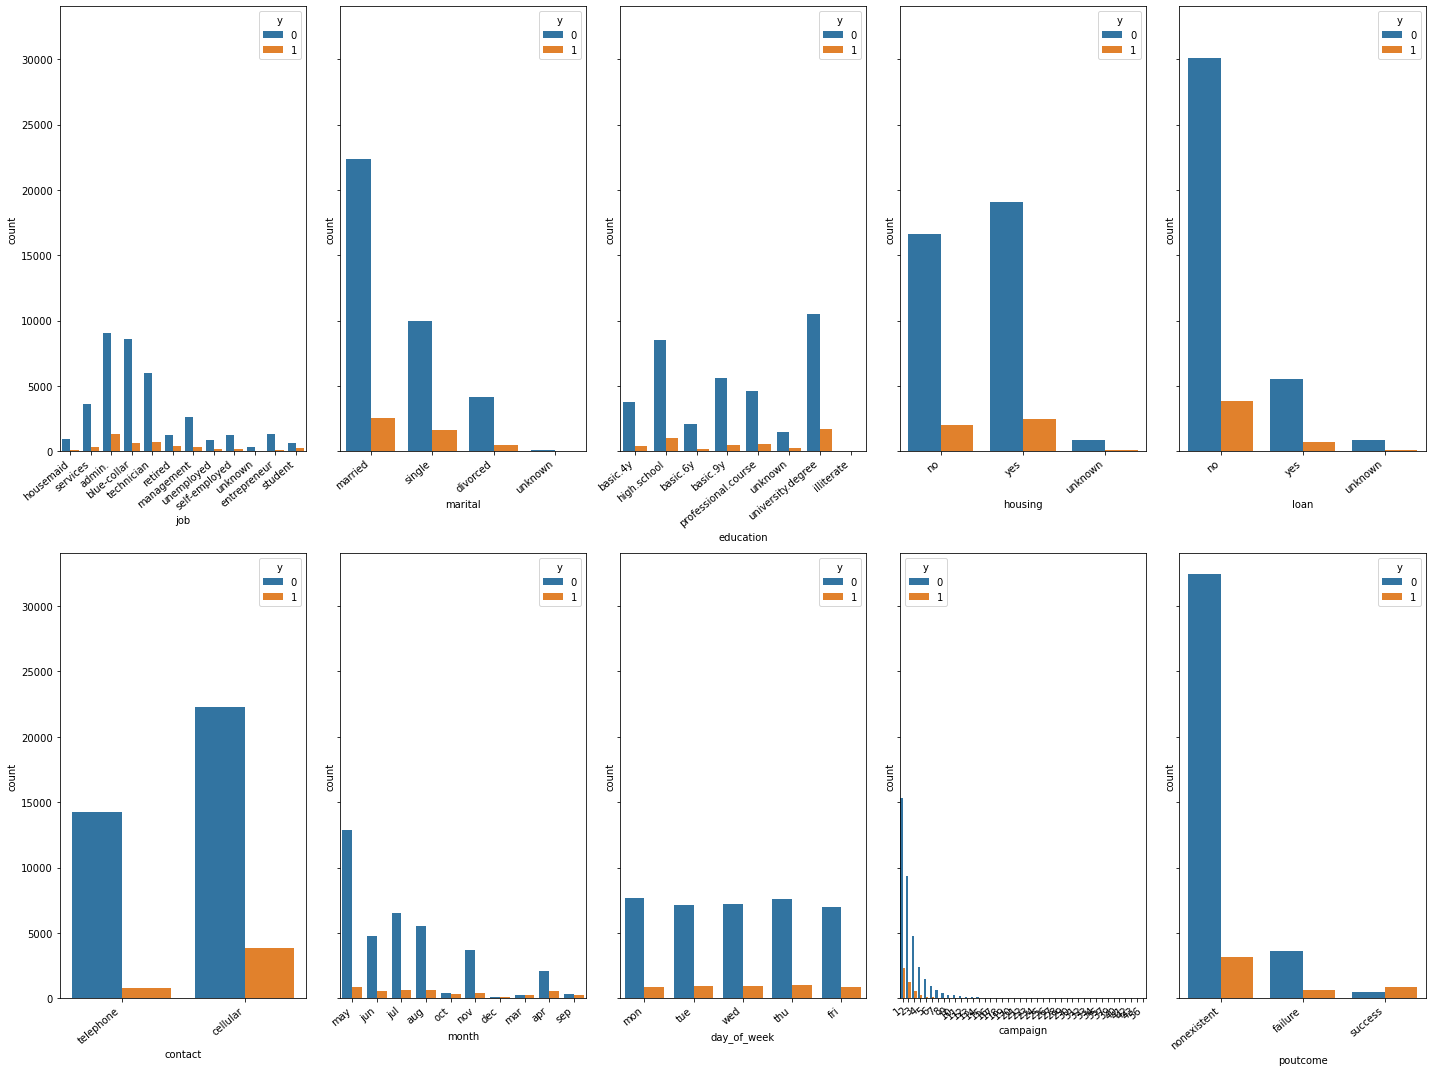

In [27]:
#Plotting the categorical variables
fig, axes = plt.subplots(2,5, figsize=(20, 15), sharey=True)
for col,ax in zip(categorical_df.columns,axes.flatten()):
    sns.countplot(x=col, hue='y',data=bank_df,ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()


In [29]:
bank_df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

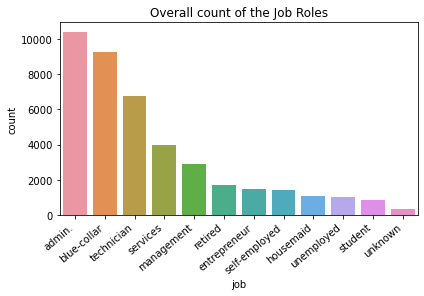

In [30]:
# Plotting the countplot for job 
ax = sns.countplot(x="job", data=bank_df,order=bank_df['job'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title('Overall count of the Job Roles')
plt.savefig('./Images/job.png', bbox_inches = 'tight')

Check for collinearity and plot the heat map.

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,x7_nov,x7_oct,x7_sep,x8_mon,x8_thu,x8_tue,x8_wed,x9_nonexistent,x9_success,x10_1
age,1.000000,0.000866,0.004594,0.034369,0.024365,0.000371,0.000857,0.129372,0.010767,0.017725,...,0.030045,0.053008,0.040889,0.019027,0.021356,0.019137,0.023671,0.016376,0.035626,0.030399
duration,0.000866,1.000000,0.071699,0.047577,0.020640,0.027968,0.005312,0.008173,0.032897,0.044703,...,0.015941,0.015454,0.018011,0.023068,0.014666,0.004140,0.014537,0.011665,0.044876,0.405274
campaign,0.004594,0.071699,1.000000,0.052584,0.079141,0.150754,0.127836,0.013733,0.135133,0.144095,...,0.079028,0.049126,0.033953,0.014405,0.005141,0.025125,0.021088,0.087645,0.050893,0.066357
pdays,0.034369,0.047577,0.052584,1.000000,0.587514,0.271004,0.078889,0.091342,0.296899,0.372605,...,0.016946,0.128677,0.154629,0.001031,0.008186,0.007300,0.001021,0.491353,0.950700,0.324914
previous,0.024365,0.020640,0.079141,0.587514,1.000000,0.420489,0.203130,0.050936,0.454494,0.501333,...,0.081050,0.127754,0.157651,0.002012,0.001512,0.000090,0.003929,0.878776,0.524045,0.230181
emp.var.rate,0.000371,0.027968,0.150754,0.271004,0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,...,0.105917,0.213706,0.170366,0.018139,0.007673,0.014582,0.026797,0.472501,0.256886,0.298334
cons.price.idx,0.000857,0.005312,0.127836,0.078889,0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,...,0.215273,0.092174,0.046905,0.001273,0.017143,0.001216,0.012479,0.304264,0.077416,0.136211
cons.conf.idx,0.129372,0.008173,0.013733,0.091342,0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,...,0.052892,0.170425,0.169175,0.041382,0.027877,0.050033,0.023711,0.099724,0.084824,0.054878
euribor3m,0.010767,0.032897,0.135133,0.296899,0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,...,0.019524,0.185937,0.190321,0.023279,0.013757,0.022732,0.030201,0.488406,0.281022,0.307771
nr.employed,0.017725,0.044703,0.144095,0.372605,0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,...,0.027593,0.273236,0.292156,0.017433,0.002658,0.009923,0.023272,0.493051,0.350613,0.354678


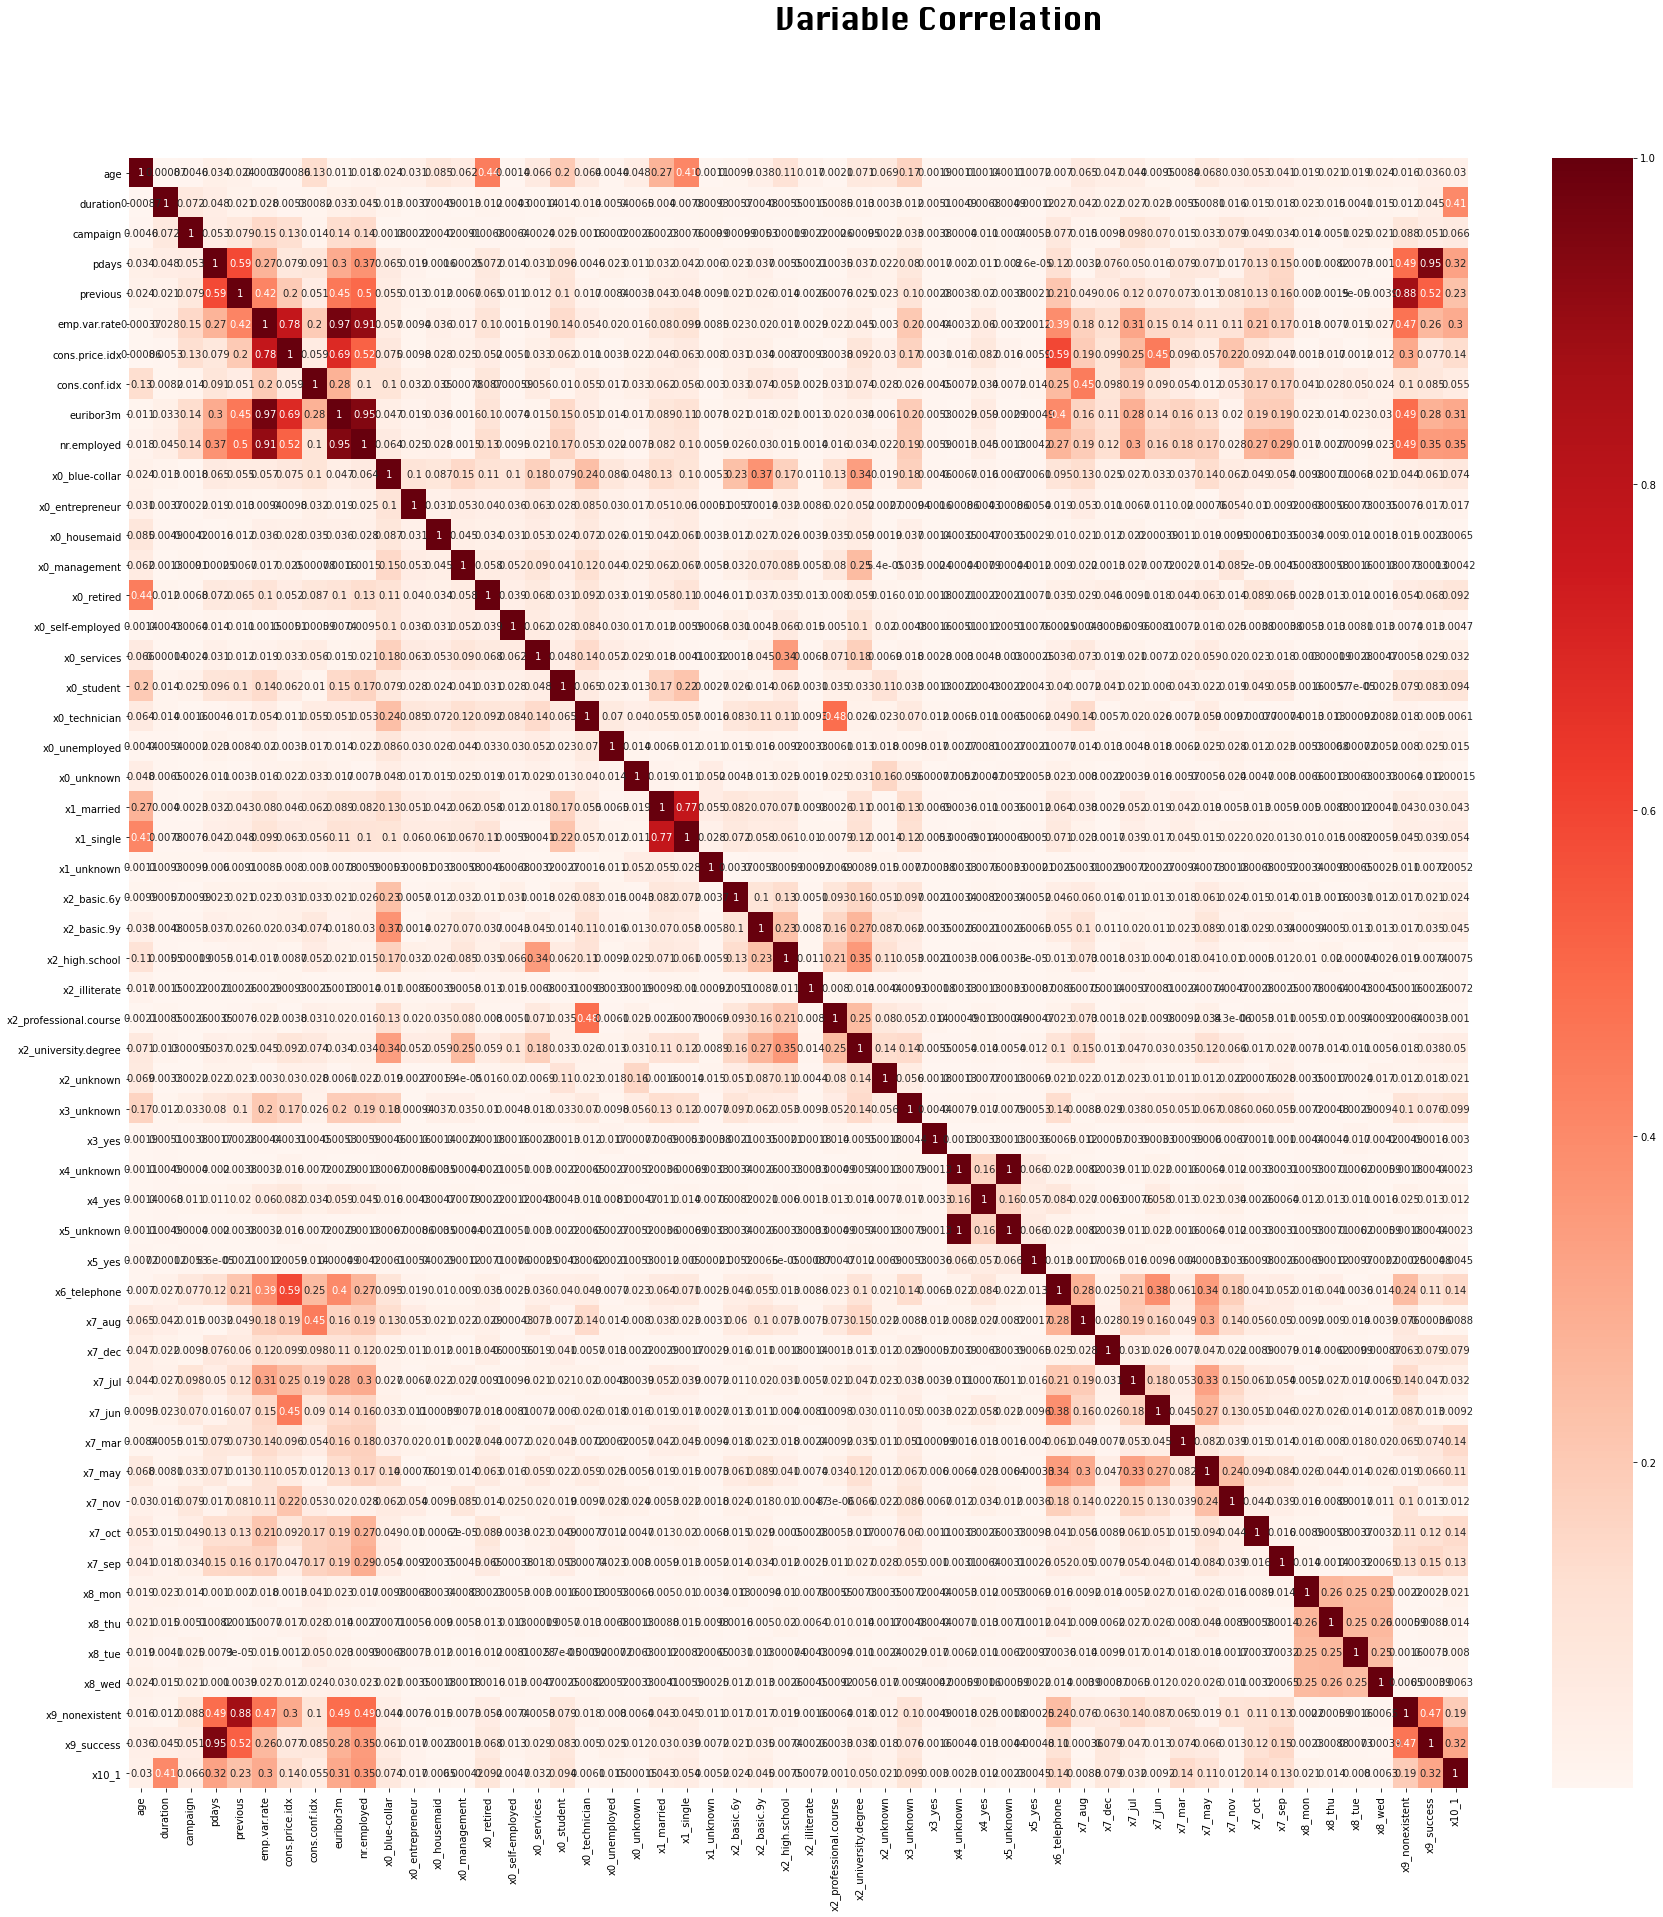

In [31]:
# check the collinearity with the target variable.
corr=df.corr().abs()
fig,ax=plt.subplots(figsize=(30,30))
fig.suptitle('Variable Correlation',fontsize=30,y=.95,fontname='Silom')
heatmap=sns.heatmap(corr,cmap='Reds', annot = True)
corr

looking at the heatmap, most of the variables are related to our target variable.

In [32]:
#Check for the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 54 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     41188 non-null  int64  
 1   duration                41188 non-null  int64  
 2   campaign                41188 non-null  int64  
 3   pdays                   41188 non-null  int64  
 4   previous                41188 non-null  int64  
 5   emp.var.rate            41188 non-null  float64
 6   cons.price.idx          41188 non-null  float64
 7   cons.conf.idx           41188 non-null  float64
 8   euribor3m               41188 non-null  float64
 9   nr.employed             41188 non-null  float64
 10  x0_blue-collar          41188 non-null  float64
 11  x0_entrepreneur         41188 non-null  float64
 12  x0_housemaid            41188 non-null  float64
 13  x0_management           41188 non-null  float64
 14  x0_retired              41188 non-null

## Model

After the process of scrub and explore, Lets start with the LogisticRegression model.

### Logistic Regression Model

Logistic regression model is used for classification problems. 

First step is to define X and y variable.

In [33]:
# define X and y
y = df['x10_1']
X = df.drop('x10_1', axis=1)

Splitting the data into train and test set. Test size = 0.20 and random_state = 42.

In [34]:
# Split the data into a training and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

Scaling the train and test set.

In [35]:
# Instantiate StandardScaler

ss = StandardScaler()

# Transform the training and test sets
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

### Fit the Model

Lets fit the scaled model into logistic regression.

In [36]:
#Fitting the model
logreg = LogisticRegression()
model = logreg.fit(X_train_scaled, y_train)

predict the regression model for train and test set. 

In [37]:
#predicting the train and test data

train_pred = logreg.predict(X_train_scaled)
test_pred = logreg.predict(X_test_scaled)

Calculate accuracy score, recall score, precision score, f1 score.

In [38]:
#Calculating the score
print('Accuracy:', accuracy_score(y_test, test_pred))
print('Recall:', recall_score(y_test, test_pred))
print('Precision:', precision_score(y_test, test_pred))
print('F1_score:', f1_score(y_test, test_pred))

Accuracy: 0.9115076474872542
Recall: 0.43422459893048126
Precision: 0.66996699669967
F1_score: 0.5269305645684621


plot the confusion matrix 

In [39]:
#plotting confusion matrix
confusion_matrix(y_test, test_pred)

array([[7103,  200],
       [ 529,  406]])

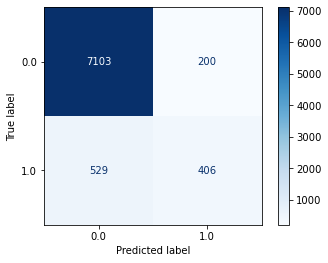

In [40]:
# plotting confusion matrix
plot_confusion_matrix(model, X_test_scaled, y_test,cmap = plt.cm.Blues)
plt.grid(False)

In [41]:
y_score = logreg.fit(X_train_scaled, y_train).decision_function(X_test_scaled)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

In [42]:
print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.9348645088349157


AUC: 0.9348645088349157


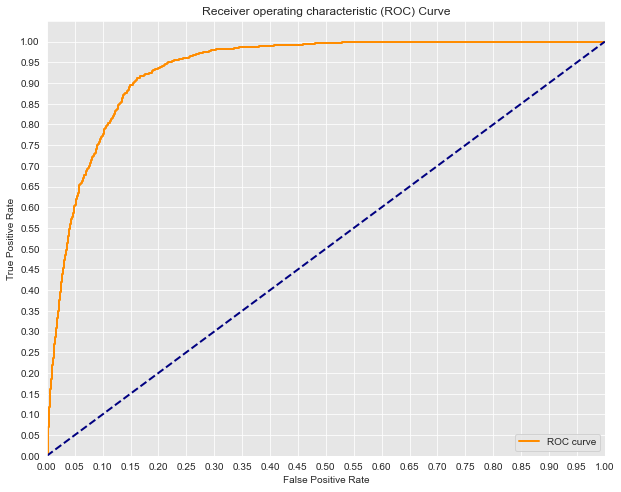

In [43]:
# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Since it is an class imbalance dataset, check the value count for target variable y.

In [44]:
# Class frequency of target variable 
df['x10_1'].value_counts()

0.0    36548
1.0     4640
Name: x10_1, dtype: int64

In [45]:
df['x10_1'].value_counts(normalize=True)

0.0    0.887346
1.0    0.112654
Name: x10_1, dtype: float64

Finding the class imbalance in the training and test sets.

In [46]:
print(y_train.value_counts())
print('\n')
# Test set
print(y_test.value_counts())

0.0    29245
1.0     3705
Name: x10_1, dtype: int64


0.0    7303
1.0     935
Name: x10_1, dtype: int64


Our dataset consist of imbalanced data and has majority value of 0. So i'm applying SMOTE to handle data imbalance.

### Apply Smote

In [47]:
#Applying smote and fit the data

X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train_scaled, y_train)
print(pd.Series(y_train_resampled).value_counts()) 

1.0    29245
0.0    29245
Name: x10_1, dtype: int64


In [48]:
# Initializing Logistic Regression and fit the model

logreg = LogisticRegression()
model_reg = logreg.fit(X_train_resampled, y_train_resampled)

In [49]:
# predicting the train and test data
train_preds = logreg.predict(X_train_resampled)
test_preds = logreg.predict(X_test_scaled)

In [50]:
#Calculating the score
print('Accuracy: ', accuracy_score(y_test, test_preds))
print('Recall:', recall_score(y_test, test_preds))
print('Precision:', precision_score(y_test, test_preds))
print('F1_score:', f1_score(y_test, test_preds))

Accuracy:  0.8631949502306385
Recall: 0.8802139037433155
Precision: 0.44776931447225243
F1_score: 0.5935809592499098


In [51]:
# calculating confusion matrix
confusion_matrix(y_test, test_preds)

array([[6288, 1015],
       [ 112,  823]])

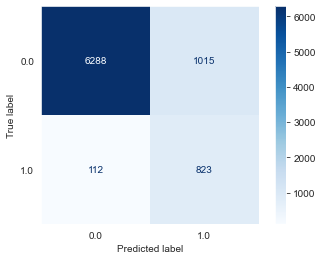

In [52]:
# plotting confusion matrix
plot_confusion_matrix(model_reg, X_test_scaled, y_test,cmap = plt.cm.Blues)
plt.grid(False)

### Tuning for better prediction

Let us tune our model with different C values for better prediction

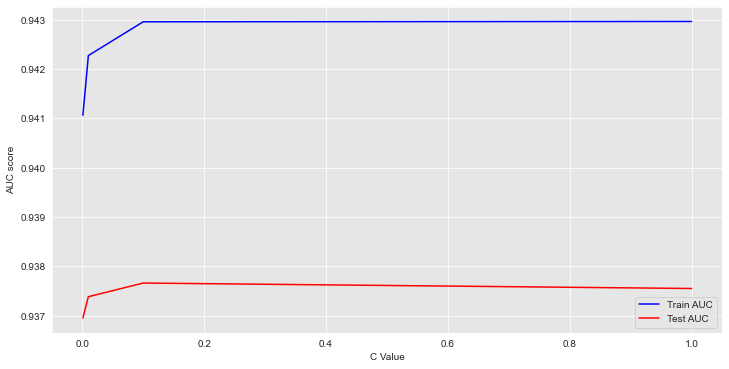

In [53]:
C = [0.001, 0.01, 0.1, 1]
train_preds = []
test_preds = []
for i in C:
    logreg = LogisticRegression(C = i, solver = 'liblinear')
    logreg.fit(X_train_resampled, y_train_resampled )
    train_pred = logreg.predict(X_train_resampled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_resampled, logreg.predict_proba(X_train_resampled)[:, 1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_preds.append(roc_auc)
    test_pred = logreg.predict(X_test_scaled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, logreg.predict_proba(X_test_scaled)[:, 1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_preds.append(roc_auc)
plt.figure(figsize = (12, 6))
plt.plot(C, train_preds, 'b', label = 'Train AUC')
plt.plot(C, test_preds, 'r', label = 'Test AUC')
plt.ylabel('AUC score')
plt.xlabel('C Value')
plt.legend()
plt.show()

After applying our tuned parameter value for prediction. At 0.1 the train and test set are constant and use this for our model.

In [54]:
# Initializing Logistic Regression 
logreg = LogisticRegression(C=0.1)
# Fitting the model
logreg.fit(X_train_resampled, y_train_resampled)

LogisticRegression(C=0.1)

In [55]:
# predicting the train and test data
train_preds = logreg.predict(X_train_resampled)
test_preds = logreg.predict(X_test_scaled)

In [56]:
#Calculating the accuracy score
print('Accuracy: ', accuracy_score(y_test, test_preds))
print('Recall:', recall_score(y_test, test_pred))
print('Precision:', precision_score(y_test, test_pred))
print('F1_score:', f1_score(y_test, test_pred))

Accuracy:  0.8625880067977665
Recall: 0.881283422459893
Precision: 0.4480696030451332
F1_score: 0.5940879596250901


In [57]:
# calculating confusion matrix
confusion_matrix(y_test, test_preds)

array([[6283, 1020],
       [ 112,  823]])

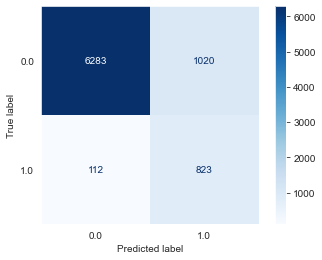

In [58]:
plot_confusion_matrix(logreg, X_test_scaled, y_test,cmap = plt.cm.Blues)
plt.grid(False)

### Applying Grid Search:

Based on the graph above lets pass the C values to grid search for prediction

In [59]:
C_param = {'C' : [0.001, 0.01, 0.1, 0.2]}

In [60]:
#Initializing GridSearch and fitting it to train set
grid_search = GridSearchCV(estimator=logreg, scoring='accuracy', param_grid=C_param, cv = 3)
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=3, estimator=LogisticRegression(C=0.1),
             param_grid={'C': [0.001, 0.01, 0.1, 0.2]}, scoring='accuracy')

In [61]:
# Finding the best parameter
best_parameters = grid_search.best_params_
best_parameters

{'C': 0.2}

Grid Search have given C value 0.2 has best parameter and let's fit with the regression model

In [62]:
logreg = LogisticRegression(C = 0.2)
logreg.fit(X_train_resampled, y_train_resampled)

LogisticRegression(C=0.2)

In [63]:
# predicting the train and test data
train_preds = logreg.predict(X_train_resampled)
test_preds = logreg.predict(X_test_scaled)

In [64]:
print('Precision:', precision_score(y_test, test_preds))

Precision: 0.44746869896570496


In [65]:
# calculating confusion matrix
confusion_matrix(y_test, test_preds)

array([[6288, 1015],
       [ 113,  822]])

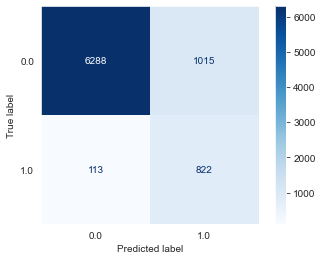

In [66]:
plot_confusion_matrix(logreg, X_test_scaled, y_test,cmap = plt.cm.Blues)
plt.grid(False)

In [67]:
# Creating classification report to find precision,recall,f1-score and support value
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

         0.0       0.98      0.86      0.92      7303
         1.0       0.45      0.88      0.59       935

    accuracy                           0.86      8238
   macro avg       0.71      0.87      0.76      8238
weighted avg       0.92      0.86      0.88      8238



AUC: 0.9348645088349157


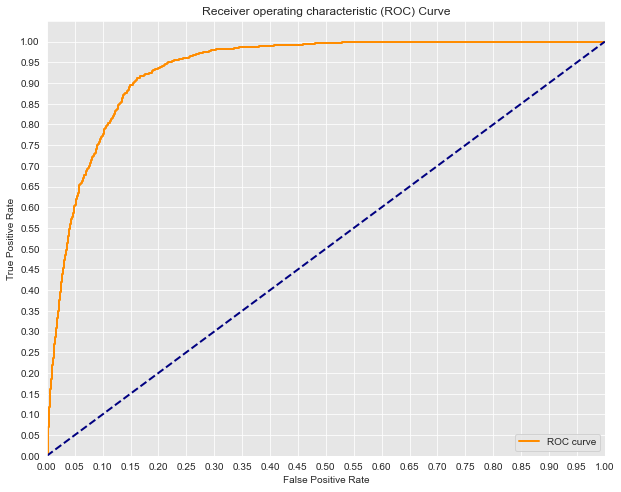

In [68]:
# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Decision Tree

Now lets start with decision tree baseline model.

To start with the model, define X and y varaible.

In [69]:
#Define X and y
y = df['x10_1']
X = df.drop('x10_1', axis=1)

In [70]:
# Split the data into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)
#Instantiate Standard Scaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

Lets fit the train and test data separately for the gini and entropy

In [71]:
#Instantiate Decision Tree Classifier model class
clf = DecisionTreeClassifier(criterion = 'entropy')
# Fitting train and test data
dtc = clf.fit(X_train_scaled, y_train)

In [72]:
#Make predictions
train_preds = clf.predict(X_train_scaled)
test_preds = clf.predict(X_test_scaled)

In [73]:
#check the precision score
print('Precision:', precision_score(y_test, test_preds))


Precision: 0.5124740124740125


In [74]:
# calculating confusion matrix
confusion_matrix(y_test, test_preds)

array([[6834,  469],
       [ 442,  493]])

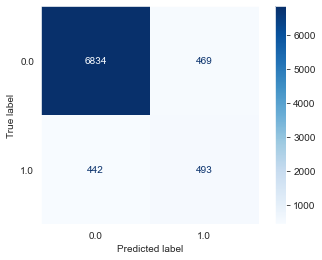

In [75]:
plot_confusion_matrix(dtc, X_test_scaled, y_test,cmap = plt.cm.Blues)
plt.grid(False)

In [76]:
# Instantiate Desicion Tree Classifier model class
classifier = DecisionTreeClassifier(criterion = 'gini')
# Fitting train and test data
dtc1 = classifier.fit(X_train_scaled, y_train)

In [77]:
#Make predictions
train_preds = classifier.predict(X_train_scaled)
test_preds = classifier.predict(X_test_scaled)


In [78]:
print('Precision:', precision_score(y_test, test_preds))


Precision: 0.49688796680497926


In [79]:
# calculating confusion matrix
confusion_matrix(y_test, test_preds)

array([[6818,  485],
       [ 456,  479]])

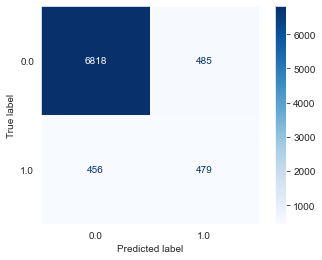

In [80]:
plot_confusion_matrix(dtc1, X_test_scaled, y_test,cmap = plt.cm.Blues)
plt.grid(False)

Since there is imbalance in the dataset,we are applying smote to balance the given data.

### Applying Smote

In [81]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [82]:
decision_entropy = DecisionTreeClassifier(criterion = 'entropy')
de = decision_entropy.fit(X_train_resampled, y_train_resampled)

In [83]:
train_preds = decision_entropy.predict(X_train_resampled)
test_preds = decision_entropy.predict(X_test_scaled)


In [84]:
print('Precision:', precision_score(y_test, test_preds))

Precision: 0.4972375690607735


In [85]:
# calculating confusion matrix
confusion_matrix(y_test, test_preds)

array([[6757,  546],
       [ 395,  540]])

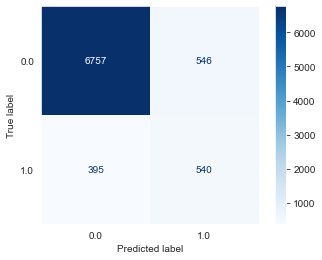

In [86]:
plot_confusion_matrix(de, X_test_scaled, y_test,cmap = plt.cm.Blues)
plt.grid(False)

In [87]:
decision_gini = DecisionTreeClassifier(criterion = 'gini')
dg = decision_gini.fit(X_train_resampled, y_train_resampled)

In [88]:
train_preds = decision_gini.predict(X_train_resampled)
test_preds = decision_gini.predict(X_test_scaled)

In [89]:
print('Precision:', precision_score(y_test, test_preds))

Precision: 0.4858962693357598


In [90]:
# calculating confusion matrix
confusion_matrix(y_test, test_preds)

array([[6738,  565],
       [ 401,  534]])

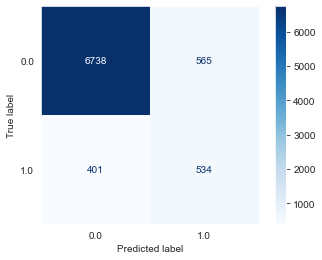

In [91]:
plot_confusion_matrix(dg, X_test_scaled, y_test,cmap = plt.cm.Blues)
plt.grid(False)

### Tuning for better prediction

Tuning the different parameter for better prediction. Here we are trying for maximum depth,minimum sample split,minimum sample leaf and maximum features

### Maximum Tree Depth

Let's first check for the best depth parameter for our decision tree

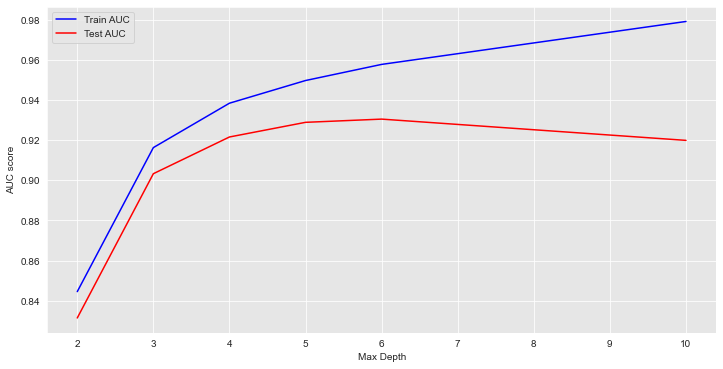

In [92]:
# Identify the optimal tree depth for given data
max_depth = [2, 3, 4, 5, 6, 10]
train_preds = []
test_preds = []
for i in max_depth:
    decision_entropy = DecisionTreeClassifier(criterion = 'entropy',max_depth = i)
    decision_entropy.fit(X_train_resampled, y_train_resampled)
    train_pred = decision_entropy.predict(X_train_resampled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_resampled, decision_entropy.predict_proba(X_train_resampled)[:, 1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_preds.append(roc_auc)
    test_pred = decision_entropy.predict(X_test_scaled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,decision_entropy.predict_proba(X_test_scaled)[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_preds.append(roc_auc)
plt.figure(figsize=(12,6))
plt.plot(max_depth, train_preds, 'b', label='Train AUC')
plt.plot(max_depth, test_preds, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Max Depth')
plt.legend()
plt.show()

From the above graph both train and test set increases at 3

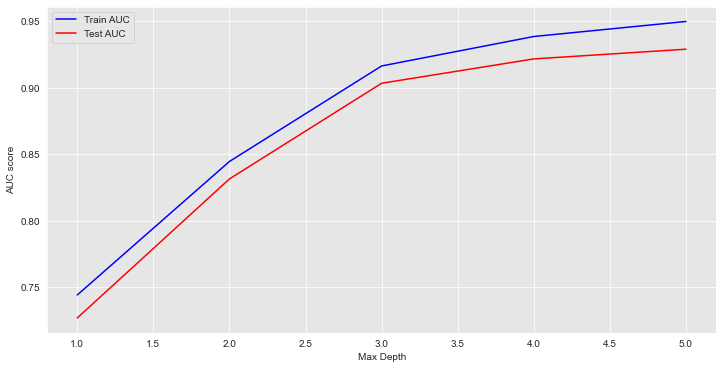

In [93]:
#Applying max_depth for values between 1 and 5
max_depth = [1,2,3,4,5]
train_preds = []
test_preds = []
for i in max_depth:
    decision_entropy = DecisionTreeClassifier(criterion = 'entropy',max_depth = i)
    decision_entropy.fit(X_train_resampled, y_train_resampled)
    train_pred = decision_entropy.predict(X_train_resampled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_resampled, decision_entropy.predict_proba(X_train_resampled)[:, 1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_preds.append(roc_auc)
    test_pred = decision_entropy.predict(X_test_scaled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,decision_entropy.predict_proba(X_test_scaled)[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_preds.append(roc_auc)
plt.figure(figsize=(12,6))
plt.plot(max_depth, train_preds, 'b', label='Train AUC')
plt.plot(max_depth, test_preds, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Max Depth')
plt.legend()
plt.show()

From the above graph both train and test set increases after 3

### Minimum Sample Split

Now check for the best min_samples_splits parameter for our decision tree

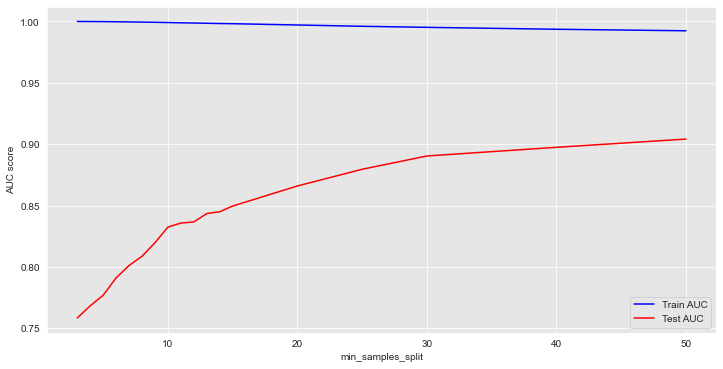

In [94]:
# Identify the optimal min-samples-split for given data

min_samples_split=[3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30,40,50]
train_preds=[]
test_preds=[]
for i in min_samples_split:
    decision_entropy = DecisionTreeClassifier(criterion='entropy',min_samples_split=i)
    decision_entropy.fit(X_train_resampled,y_train_resampled)
    train_pred = decision_entropy.predict(X_train_resampled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_resampled,decision_entropy.predict_proba(X_train_resampled)[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_preds.append(roc_auc)
    test_pred = decision_entropy.predict(X_test_scaled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,decision_entropy.predict_proba(X_test_scaled)[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_preds.append(roc_auc)
plt.figure(figsize=(12,6))
plt.plot(min_samples_split, train_preds, 'b', label='Train AUC')
plt.plot(min_samples_split, test_preds, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('min_samples_split')
plt.legend()
plt.show()

From the above graph test data increases after 20.

Lets try min_sample_split for shorter range to see the difference

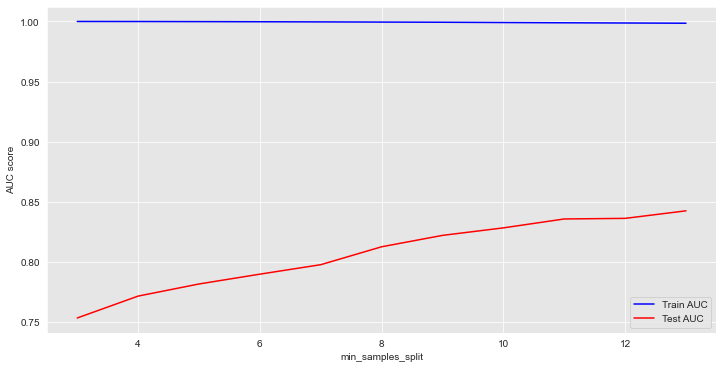

In [95]:
# Applying min_samples_split for lower value between 3 and 13
min_samples_split=[3,4,5,6,7,8,9,10,11,12,13]
train_preds=[]
test_preds=[]
for i in min_samples_split:
    decision_entropy = DecisionTreeClassifier(criterion='entropy',min_samples_split=i)
    decision_entropy.fit(X_train_resampled,y_train_resampled)
    train_pred = decision_entropy.predict(X_train_resampled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_resampled,decision_entropy.predict_proba(X_train_resampled)[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_preds.append(roc_auc)
    test_pred = decision_entropy.predict(X_test_scaled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,decision_entropy.predict_proba(X_test_scaled)[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_preds.append(roc_auc)
plt.figure(figsize=(12,6))
plt.plot(min_samples_split, train_preds, 'b', label='Train AUC')
plt.plot(min_samples_split, test_preds, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('min_samples_split')
plt.legend()
plt.show()

From the above graph test data increases after 10.

### Minimum Sample Leafs

Now check for the best min_samples_leafs parameter value for our decision tree

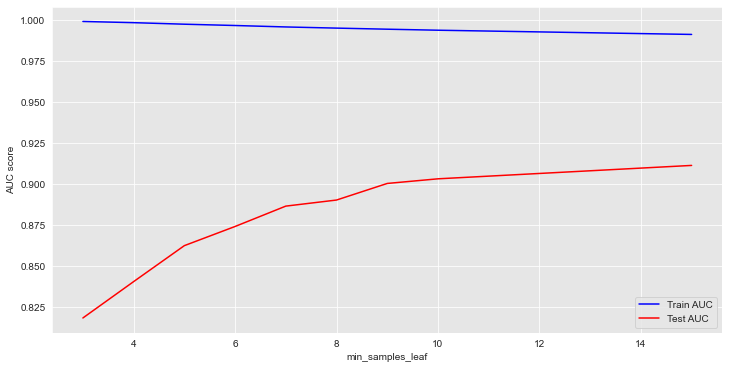

In [96]:
# Calculate the optimal value for minimum sample leafs
min_samples_leaf=[3,4,5,6,7,8,9,10,15]
train_preds=[]
test_preds=[]
for i in min_samples_leaf:
    decision_entropy = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=i)
    decision_entropy.fit(X_train_resampled,y_train_resampled)
    train_pred = decision_entropy.predict(X_train_resampled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_resampled,decision_entropy.predict_proba(X_train_resampled)[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_preds.append(roc_auc)
    test_pred = decision_entropy.predict(X_test_scaled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,decision_entropy.predict_proba(X_test_scaled)[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_preds.append(roc_auc)
plt.figure(figsize=(12,6))
plt.plot(min_samples_leaf, train_preds, 'b', label='Train AUC')
plt.plot(min_samples_leaf, test_preds, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('min_samples_leaf')
plt.legend()
plt.show()

From the above graph training data remains constant and test data increases after 12.

### Maximum Features

Now check for the best max_features parameter value for our decision tree

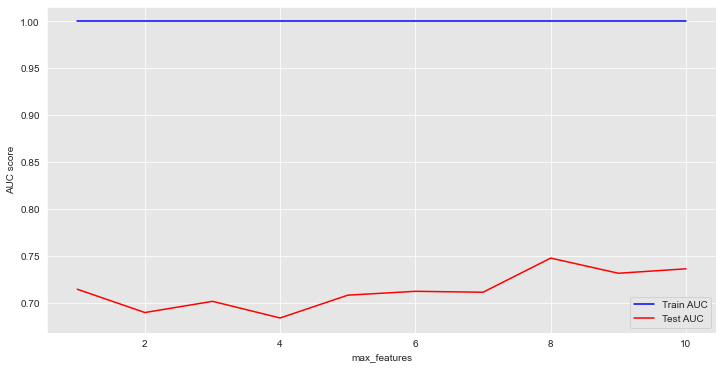

In [97]:
# Find the best value for optimal maximum feature size
max_features=[1,2,3,4,5,6,7,8,9,10]
train_preds=[]
test_preds=[]
for n in max_features:
    decision_entropy = DecisionTreeClassifier(criterion='entropy',max_features=n)
    decision_entropy.fit(X_train_resampled,y_train_resampled)
    train_pred = decision_entropy.predict(X_train_resampled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_resampled,decision_entropy.predict_proba(X_train_resampled)[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_preds.append(roc_auc)
    test_pred = decision_entropy.predict(X_test_scaled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,decision_entropy.predict_proba(X_test_scaled)[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_preds.append(roc_auc)
plt.figure(figsize=(12,6))
plt.plot(max_features, train_preds, 'b', label='Train AUC')
plt.plot(max_features, test_preds, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('max_features')
plt.legend()
plt.show()


From the above graph training data remains constant and test data increases after 6.

In [98]:
# Train a classifier with optimal values identified above
decision_tuning = DecisionTreeClassifier(criterion='entropy',
                                         max_depth=3,
                                         min_samples_leaf=12,
                                         min_samples_split=10,
                                         max_features=6)
decision_tuning.fit(X_train_resampled,y_train_resampled)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=6,
                       min_samples_leaf=12, min_samples_split=10)

In [99]:
#make predictions
train_preds = decision_tuning.predict(X_train_resampled)
test_preds = decision_tuning.predict(X_test_scaled)

In [100]:
print('Precision:', precision_score(y_test, test_preds))


Precision: 0.4339796860572484


In [101]:
# calculating confusion matrix
confusion_matrix(y_test, test_preds)

array([[6690,  613],
       [ 465,  470]])

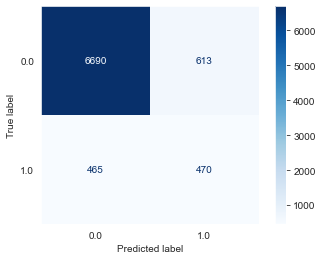

In [102]:
plot_confusion_matrix(decision_tuning, X_test_scaled, y_test,cmap = plt.cm.Blues)
plt.grid(False)

### Applying Grid Search

In [103]:
parameters = {
    'criterion':['gini','entropy'],
    'max_depth':[2,3,4,5,6],
    'min_samples_split':[5,6,7,9,10],
    'min_samples_leaf':[3,4,5],
    'max_features':[12,13,14,15] 
    }

In [104]:
decision_grid = DecisionTreeClassifier()
decision_grid.fit(X_train_resampled,y_train_resampled)

DecisionTreeClassifier()

In [105]:
#Instantiate GridSearch
grid_search=GridSearchCV(decision_grid,parameters,cv=3)
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': [12, 13, 14, 15],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [5, 6, 7, 9, 10]})

In [106]:
print(f"Best Parameter :{grid_search.best_params_}")


Mean Training Score: 0.59%
Mean Test Score: 75.31%
Best Parameter :{'criterion': 'entropy', 'max_depth': 6, 'max_features': 14, 'min_samples_leaf': 5, 'min_samples_split': 5}


Let us use the best parameter to build our final decision tree model

In [107]:
decision_grid = DecisionTreeClassifier(criterion='entropy',
                                       max_depth=6,
                                       min_samples_leaf=5,
                                       min_samples_split=5,
                                       max_features=14, 
                                       random_state=42)
decision_grid.fit(X_train_resampled,y_train_resampled)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features=14,
                       min_samples_leaf=4, min_samples_split=5,
                       random_state=42)

In [108]:
train_preds=decision_grid.predict(X_train_resampled)
test_preds=decision_grid.predict(X_test_scaled)

In [109]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

         0.0       0.98      0.79      0.87      7303
         1.0       0.35      0.88      0.50       935

    accuracy                           0.80      8238
   macro avg       0.66      0.83      0.68      8238
weighted avg       0.91      0.80      0.83      8238



In [110]:
print('Preciison:', precision_score(y_test, test_preds))

Preciison: 0.34539335296592344


In [111]:
confusion_matrix(y_test,test_preds)

array([[5747, 1556],
       [ 114,  821]])

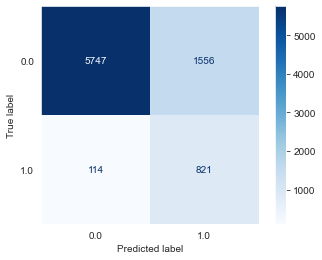

In [112]:
# plotting confusion matrix
plot_confusion_matrix(decision_grid, X_test_scaled, y_test,cmap = plt.cm.Blues)
plt.grid(False)

let us plot feature importance to check which feature is been useful for predicting in our model

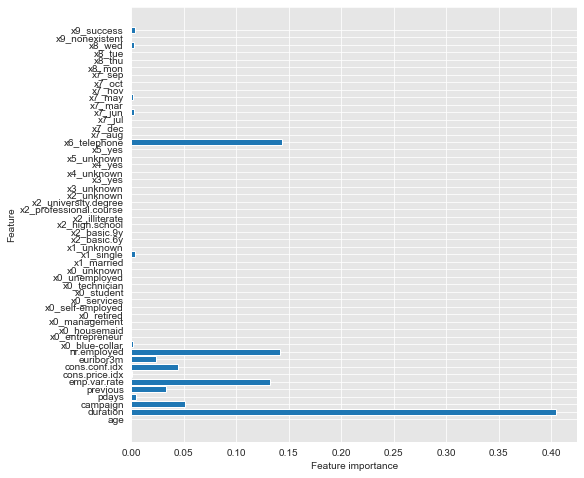

In [113]:
# Function to plot feature importance
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(decision_grid)
plt.savefig('./Images/feature.png', bbox_inches = 'tight')

In [114]:
# Function to plot ROC Curve
'''
      Step 1 : Calculate false positive rate and true positive rate
      Step 2 : Calculate roc 
      Step 3 : plot the false positive rate and true positive rate
   
'''
def roc_curves(model):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_resampled, model.predict_proba(X_train_resampled)[:, 1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.figure()
    lw = 2
    plt.plot(false_positive_rate, true_positive_rate, color = 'darkorange',
         lw = lw, label = 'ROC curve (area = %0.3f)' % (roc_auc))
    plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc = "lower right")
    return plt.show()

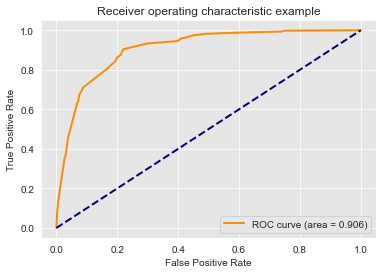

In [115]:
roc_curves(decision_grid)


## XG Boost

lets start with XG Boost baseline model

Define X and y variable

In [116]:
#Define X and y
y = df['x10_1']
X = df.drop('x10_1', axis=1)

In [117]:
# Split the data into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)
#Instantiate StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [118]:
# Instantiate XGBClassifier
xgb = XGBClassifier()

# Fit XGBClassifier
xgb.fit(X_train_scaled,y_train)
# Predict on training and test sets
training_preds = xgb.predict(X_train_scaled)
test_preds = xgb.predict(X_test_scaled)

# Preciison for training and test sets
training_precision = precision_score(y_train,training_preds)
test_precision = precision_score(y_test,test_preds)

print('Training Precision: {:.4}%'.format(training_precision * 100))
print('Validation Precision: {:.4}%'.format(test_precision * 100))

Training Precision: 87.95%
Validation Precision: 64.77%


In [119]:
confusion_matrix(y_test,test_preds)

array([[7025,  278],
       [ 424,  511]])

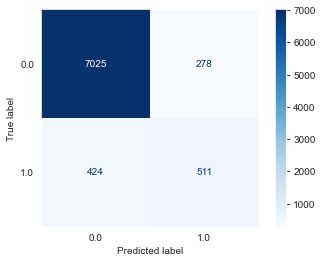

In [120]:
# plotting confusion matrix
plot_confusion_matrix(xgb, X_test_scaled, y_test,cmap = plt.cm.Blues)
plt.grid(False)

### Applying Smote

In [121]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [122]:
# Instantiate XGBClassifier
xgb = XGBClassifier()

# Fit XGBClassifier

xgb.fit(X_train_resampled,y_train_resampled)
# Predict on training and test sets
training_preds = xgb.predict(X_train_resampled)
test_preds = xgb.predict(X_test_scaled)

In [123]:
print('Precision:', precision_score(y_test, test_preds))

Precision: 0.6096196868008948


In [124]:
# calculating confusion matrix
confusion_matrix(y_test, test_preds)

array([[6954,  349],
       [ 390,  545]])

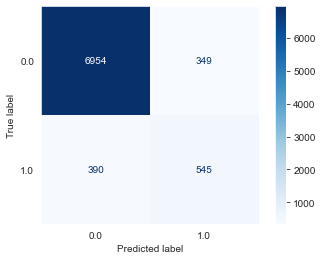

In [125]:
plot_confusion_matrix(xgb, X_test_scaled, y_test,cmap = plt.cm.Blues)
plt.grid(False)

### Tunning for better prediction

### Maximum Depth

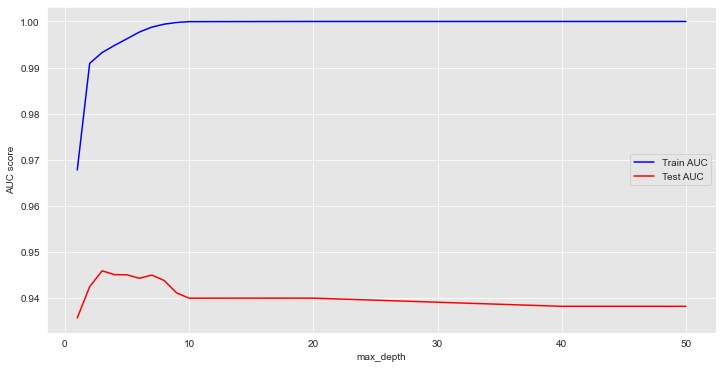

In [126]:
# Identify the optimal tree depth for given data
max_depth=[1,2,3,4,5,6,7,8,9,10,20,40,50]
train_preds=[]
test_preds=[]
for n in max_depth:
    xgb = XGBClassifier(max_depth=n)
    xgb.fit(X_train_resampled,y_train_resampled)
    train_pred = xgb.predict(X_train_resampled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_resampled,xgb.predict_proba(X_train_resampled)[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_preds.append(roc_auc)
    test_pred = xgb.predict(X_test_scaled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,xgb.predict_proba(X_test_scaled)[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_preds.append(roc_auc)
plt.figure(figsize=(12,6))
plt.plot(max_depth, train_preds, 'b', label='Train AUC')
plt.plot(max_depth, test_preds, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('max_depth')
plt.legend()
plt.show()

From the above graph, after value 10 train and test data looks constant. Hence reducing the max_depth value

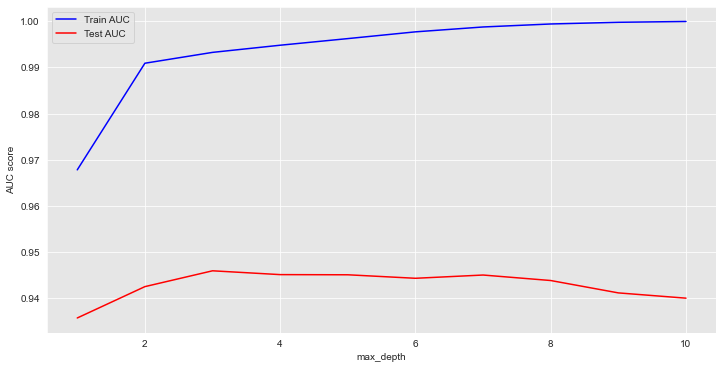

In [127]:
# Identify the optimal tree depth for given data
max_depth=[1,2,3,4,5,6,7,8,9,10]
train_preds=[]
test_preds=[]
for n in max_depth:
    xgb = XGBClassifier(max_depth=n)
    xgb.fit(X_train_resampled,y_train_resampled)
    train_pred = xgb.predict(X_train_resampled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_resampled,xgb.predict_proba(X_train_resampled)[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_preds.append(roc_auc)
    test_pred = xgb.predict(X_test_scaled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,xgb.predict_proba(X_test_scaled)[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_preds.append(roc_auc)
plt.figure(figsize=(12,6))
plt.plot(max_depth, train_preds, 'b', label='Train AUC')
plt.plot(max_depth, test_preds, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('max_depth')
plt.legend()
plt.show()

From the above graph at the max_depth 1 ,the train and test data increases. 

### Learning Rate

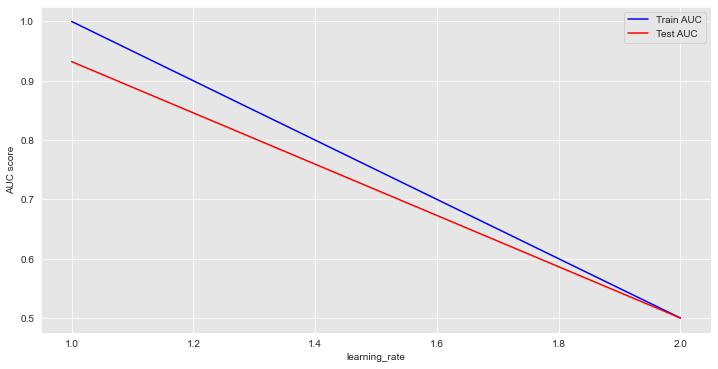

In [128]:
# Identify the learning rate
learning_rate=[1,2]
train_preds=[]
test_preds=[]
for n in learning_rate:
    xgb = XGBClassifier(learning_rate=n)
    xgb.fit(X_train_resampled,y_train_resampled)
    train_pred = xgb.predict(X_train_resampled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_resampled,xgb.predict_proba(X_train_resampled)[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_preds.append(roc_auc)
    test_pred = xgb.predict(X_test_scaled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,xgb.predict_proba(X_test_scaled)[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_preds.append(roc_auc)
plt.figure(figsize=(12,6))
plt.plot(learning_rate, train_preds, 'b', label='Train AUC')
plt.plot(learning_rate, test_preds, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('learning_rate')
plt.legend()
plt.show()

From the above graph, at learning_rate 1 and 0.92 both train and test set decreases. Let us check value within 1.

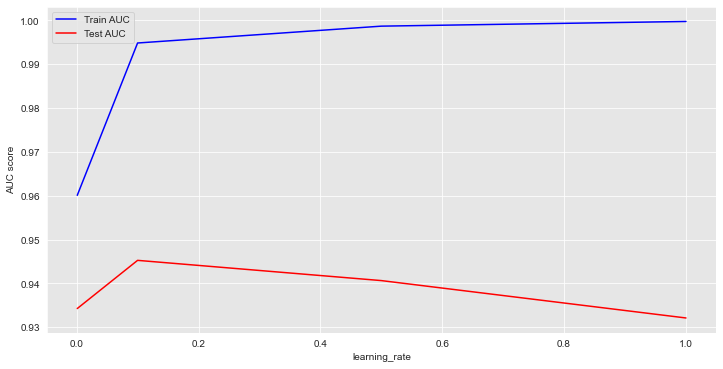

In [129]:
# Indentify the learning rate
learning_rate=[0.001,0.1,0.5,1]
train_preds=[]
test_preds=[]
for n in learning_rate:
    xgb = XGBClassifier(learning_rate=n)
    xgb.fit(X_train_resampled,y_train_resampled)
    train_pred = xgb.predict(X_train_resampled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_resampled,xgb.predict_proba(X_train_resampled)[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_preds.append(roc_auc)
    test_pred = xgb.predict(X_test_scaled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,xgb.predict_proba(X_test_scaled)[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_preds.append(roc_auc)
plt.figure(figsize=(12,6))
plt.plot(learning_rate, train_preds, 'b', label='Train AUC')
plt.plot(learning_rate, test_preds, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('learning_rate')
plt.legend()
plt.show()

From the above graph, learning rate at 0.6 both train and test data decreases and futher reducing the values to check the result.

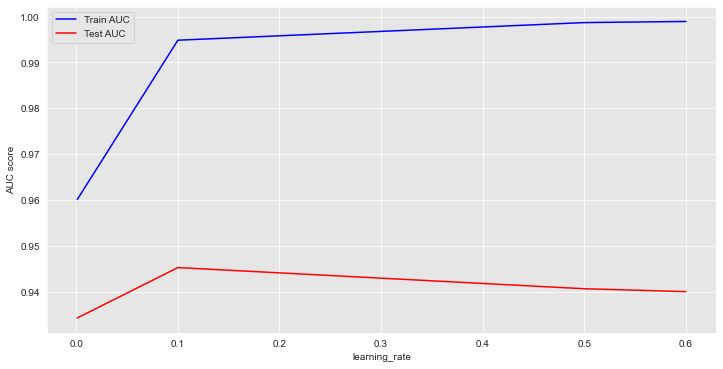

In [130]:
learning_rate=[0.001,0.1,0.5,0.6]
train_preds=[]
test_preds=[]
for n in learning_rate:
    xgb = XGBClassifier(learning_rate=n)
    xgb.fit(X_train_resampled,y_train_resampled)
    train_pred = xgb.predict(X_train_resampled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_resampled,xgb.predict_proba(X_train_resampled)[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_preds.append(roc_auc)
    test_pred = xgb.predict(X_test_scaled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,xgb.predict_proba(X_test_scaled)[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_preds.append(roc_auc)
plt.figure(figsize=(12,6))
plt.plot(learning_rate, train_preds, 'b', label='Train AUC')
plt.plot(learning_rate, test_preds, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('learning_rate')
plt.legend()
plt.show()

Learning rate at 0.1 looks good as both train and test data increases.

### Minimum Child Weight

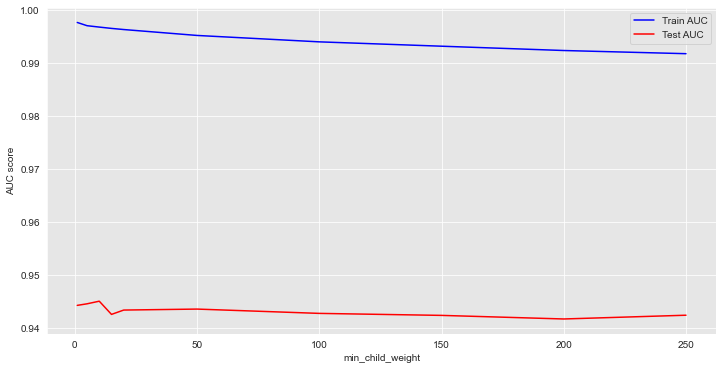

In [131]:
# Identify the minimum child weight of the model
min_child_weight=[1,5,10,15,20,50,100,150,200,250]
train_preds=[]
test_preds=[]
for n in min_child_weight:
    xgb = XGBClassifier(min_child_weight=n)
    xgb.fit(X_train_resampled,y_train_resampled)
    train_pred = xgb.predict(X_train_resampled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_resampled,xgb.predict_proba(X_train_resampled)[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_preds.append(roc_auc)
    test_pred = xgb.predict(X_test_scaled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,xgb.predict_proba(X_test_scaled)[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_preds.append(roc_auc)
plt.figure(figsize=(12,6))
plt.plot(min_child_weight, train_preds, 'b', label='Train AUC')
plt.plot(min_child_weight, test_preds, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('min_child_weight')
plt.legend()
plt.show()

from the above graph both train and test decreases after 30.

Lets minimize our min_child_weight range.

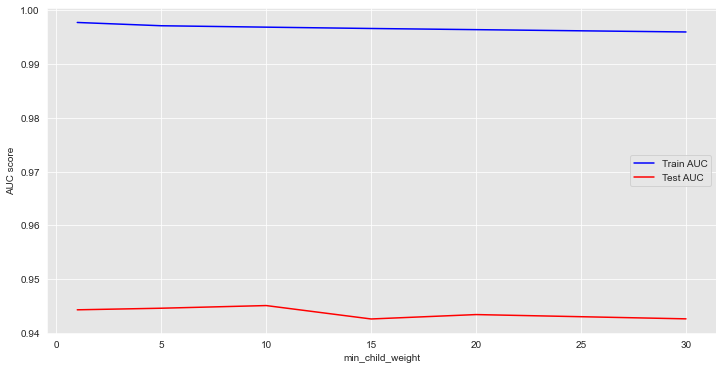

In [132]:
# Identify the minimum child weight of the model
min_child_weight=[1,5,10,15,20,30]
train_preds=[]
test_preds=[]
for n in min_child_weight:
    xgb = XGBClassifier(min_child_weight=n)
    xgb.fit(X_train_resampled,y_train_resampled)
    train_pred = xgb.predict(X_train_resampled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_resampled,xgb.predict_proba(X_train_resampled)[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_preds.append(roc_auc)
    test_pred = xgb.predict(X_test_scaled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,xgb.predict_proba(X_test_scaled)[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_preds.append(roc_auc)
plt.figure(figsize=(12,6))
plt.plot(min_child_weight, train_preds, 'b', label='Train AUC')
plt.plot(min_child_weight, test_preds, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('min_child_weight')
plt.legend()
plt.show()


Let us reduce the min_child_weight range futher more for clearer view

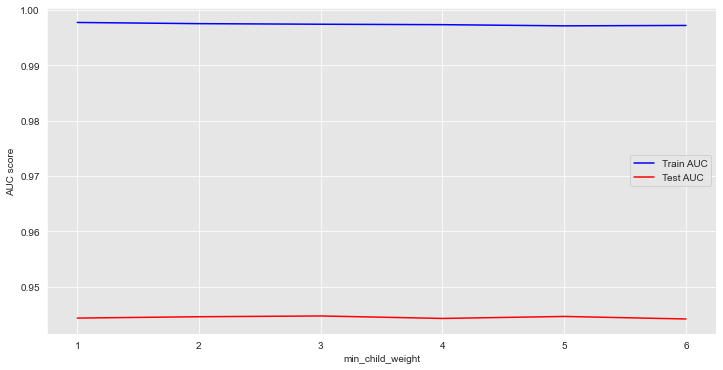

In [133]:
min_child_weight=[1,2,3,4,5,6]
train_preds=[]
test_preds=[]
for n in min_child_weight:
    xgb = XGBClassifier(min_child_weight=n)
    xgb.fit(X_train_resampled,y_train_resampled)
    train_pred = xgb.predict(X_train_resampled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_resampled,xgb.predict_proba(X_train_resampled)[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_preds.append(roc_auc)
    test_pred = xgb.predict(X_test_scaled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,xgb.predict_proba(X_test_scaled)[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_preds.append(roc_auc)
plt.figure(figsize=(12,6))
plt.plot(min_child_weight, train_preds, 'b', label='Train AUC')
plt.plot(min_child_weight, test_preds, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('min_child_weight')
plt.legend()
plt.show()

min_child_weight looks good as both train and test data have similar results

### Subsample

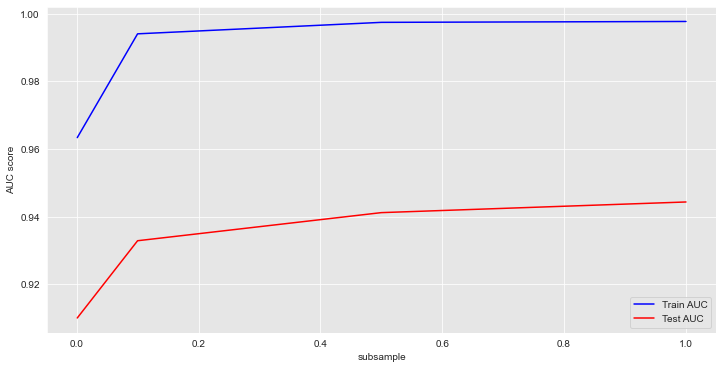

In [134]:
# creating subsample and applying them
subsample=[0.001,0.1,0.5,1]
train_preds=[]
test_preds=[]
for n in subsample:
    xgb = XGBClassifier(subsample=n)
    xgb.fit(X_train_resampled,y_train_resampled)
    train_pred = xgb.predict(X_train_resampled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_resampled,xgb.predict_proba(X_train_resampled)[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_preds.append(roc_auc)
    test_pred = xgb.predict(X_test_scaled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,xgb.predict_proba(X_test_scaled)[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_preds.append(roc_auc)
plt.figure(figsize=(12,6))
plt.plot(subsample, train_preds, 'b', label='Train AUC')
plt.plot(subsample, test_preds, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('subsample')
plt.legend()
plt.show()

Lets take subsample value of 0.1 as both train and test data increases.

### n_estimators

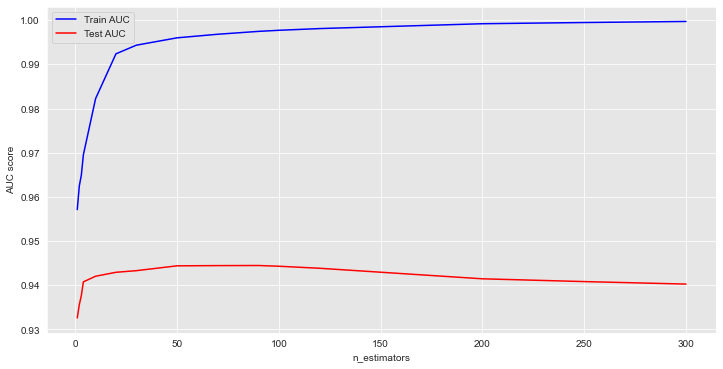

In [135]:
#  creating n_estimators to the model
n_estimators=[1,2,3,4,10,20,30,50,70,90,100,120,200,250,300]
train_preds=[]
test_preds=[]
for n in n_estimators:
    xgb = XGBClassifier(n_estimators=n)
    xgb.fit(X_train_resampled,y_train_resampled)
    train_pred = xgb.predict(X_train_resampled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_resampled,xgb.predict_proba(X_train_resampled)[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_preds.append(roc_auc)
    test_pred = xgb.predict(X_test_scaled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,xgb.predict_proba(X_test_scaled)[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_preds.append(roc_auc)
plt.figure(figsize=(12,6))
plt.plot(n_estimators, train_preds, 'b', label='Train AUC')
plt.plot(n_estimators, test_preds, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.legend()
plt.show()

After n_estimators value of 50, train and test data remains unchanged

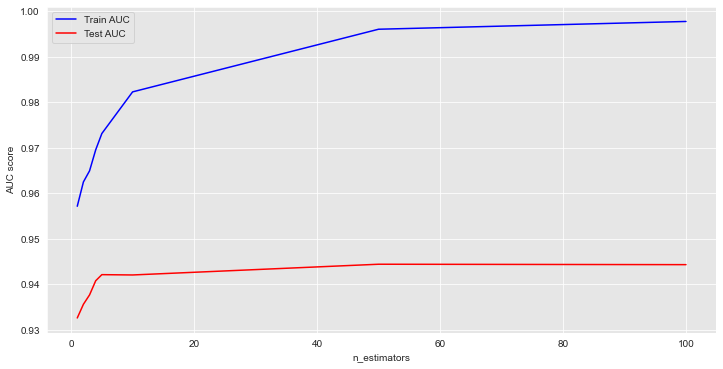

In [136]:
n_estimators=[1,2,3,4,5,10,50,100]
train_preds=[]
test_preds=[]
for n in n_estimators:
    xgb = XGBClassifier(n_estimators=n)
    xgb.fit(X_train_resampled,y_train_resampled)
    train_pred = xgb.predict(X_train_resampled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_resampled,xgb.predict_proba(X_train_resampled)[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_preds.append(roc_auc)
    test_pred = xgb.predict(X_test_scaled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,xgb.predict_proba(X_test_scaled)[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_preds.append(roc_auc)
plt.figure(figsize=(12,6))
plt.plot(n_estimators, train_preds, 'b', label='Train AUC')
plt.plot(n_estimators, test_preds, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.legend()
plt.show()

At n_estimator value of 10, train and test data increases. Now lets build our tuned model

In [137]:
# Instantiate XGBClassifier
xgb = XGBClassifier(learning_rate=0.1,max_depth=1,min_child_weight=1,n_estimators=10,subsample=0.1)

# Fit XGBClassifier

xgb.fit(X_train_resampled,y_train_resampled)
# Predict on training and test sets
training_preds = xgb.predict(X_train_resampled)
test_preds = xgb.predict(X_test_scaled)

# Precision of training and test sets
training_precision = precision_score(y_train_resampled,training_preds)
test_preciison = precision_score(y_test,test_preds)

print('Training Precision: {:.4}%'.format(training_precision * 100))
print('Validation Precision: {:.4}%'.format(test_precision * 100))

Training Precision: 83.92%
Validation Precision: 64.77%


In [138]:
xgb.score(X_test_scaled, y_test)

0.8351541636319495

In [139]:
confusion_matrix(y_test,test_preds)

array([[6094, 1209],
       [ 149,  786]])

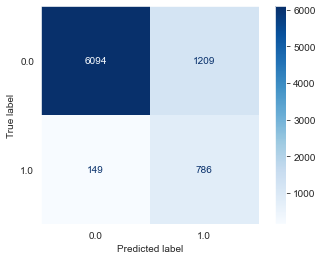

In [140]:
# plotting confusion matrix
plot_confusion_matrix(xgb, X_test_scaled, y_test,cmap = plt.cm.Blues)
plt.grid(False)

### Applying Grid Search

In [141]:
param_grid = {
    'learning_rate': [0.1, 0.5],
    'max_depth': [1,2,3,4,5,6],
    'min_child_weight': [2, 3],
    'subsample': [0.1,0.2],
    'n_estimators': [10,50,100],
}

In [142]:
grid_clf = GridSearchCV(xgb,param_grid,scoring='accuracy',cv=3,n_jobs=1)
grid_clf.fit(X_train_resampled,y_train_resampled)

best_parameters = grid_clf.best_params_
best_parameters

{'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 2,
 'n_estimators': 50,
 'subsample': 0.2}

Lets apply our best parameter value to build final model

In [143]:
# Instantiate XGBClassifier
xgb = XGBClassifier(learning_rate=0.1,
                    max_depth=6,
                    min_child_weight=2,
                    n_estimators=50,
                    subsample=0.2)

# Fit XGBClassifier

xgb.fit(X_train_resampled,y_train_resampled)
# Predict on training and test sets
training_preds = xgb.predict(X_train_resampled)
test_preds = xgb.predict(X_test_scaled)

# Precision of training and test sets
training_precision = precision_score(y_train_resampled,training_preds)
test_precision = precision_score(y_test,test_preds)

print('Training Precision: {:.4}%'.format(training_precision * 100))
print('Validation Precision: {:.4}%'.format(test_precision * 100))

Training Precision: 94.58%
Validation Precision: 57.66%


In [144]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95      7303
         1.0       0.58      0.70      0.63       935

    accuracy                           0.91      8238
   macro avg       0.77      0.82      0.79      8238
weighted avg       0.92      0.91      0.91      8238



In [145]:
xgb.score(X_test_scaled, y_test)

0.907623209516873

In [146]:
confusion_matrix(y_test,test_preds)

array([[6822,  481],
       [ 280,  655]])

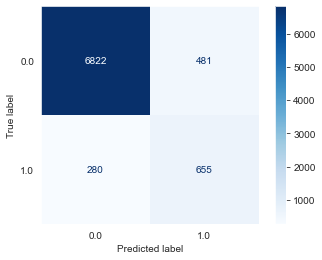

In [147]:
plot_confusion_matrix(xgb, X_test_scaled, y_test,cmap = plt.cm.Blues)
plt.grid(False)

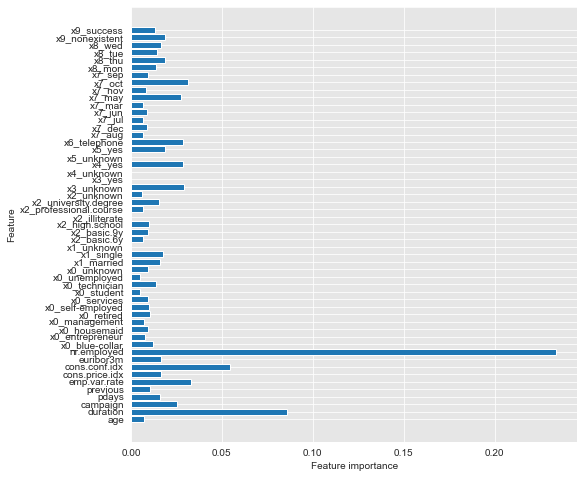

In [148]:
plot_feature_importances(xgb)

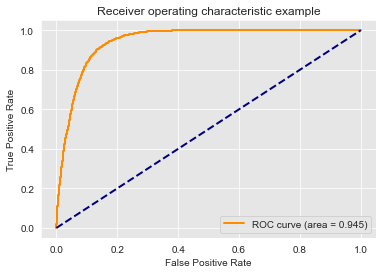

In [149]:
roc_curves(xgb)

## Random Forest

Lets start with Random Forest baseline model 

In [150]:
#Define X and y
y = df['x10_1']
X = df.drop('x10_1', axis=1)

In [151]:
# Split the data into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)
#Instantiate StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [152]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [153]:
#make predictions
train_preds=forest.predict(X_train_scaled)
test_preds=forest.predict(X_test_scaled)

In [154]:
print('Precision:%s'%(precision_score(y_test,test_preds)))

Precision:0.6425591098748261


In [155]:
confusion_matrix(y_test,test_preds)

array([[7046,  257],
       [ 473,  462]])

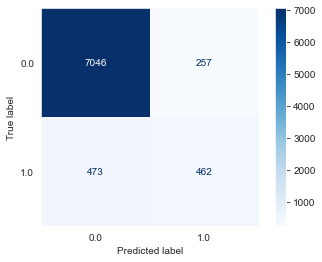

In [156]:
plot_confusion_matrix(forest, X_test_scaled, y_test,cmap = plt.cm.Blues)
plt.grid(False)

### Applying Smote

In [157]:
#Instantiate smote 
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [158]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [159]:
#Make predictions
train_preds=forest.predict(X_train_resampled)
test_preds=forest.predict(X_test_scaled)

In [160]:
print('Precision:%s'%(precision_score(y_test,test_preds)))

Precision:0.5712861415752741


In [161]:
confusion_matrix(y_test,test_preds)

array([[6873,  430],
       [ 362,  573]])

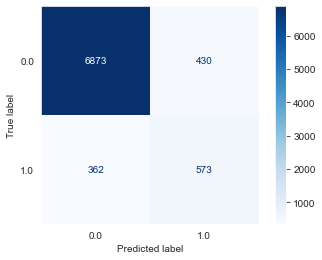

In [162]:
plot_confusion_matrix(forest, X_test_scaled, y_test,cmap = plt.cm.Blues)
plt.grid(False)

### Tuning the model for better prediction

Lets tune the n_estimator and maximum depth for better prediction.

### n_estimators

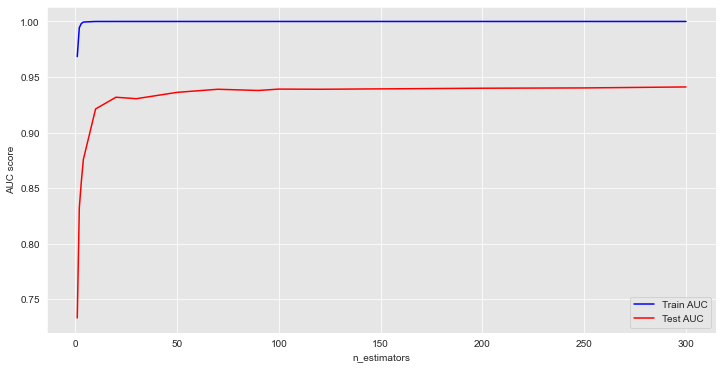

In [163]:
n_estimators=[1,2,3,4,10,20,30,50,70,90,100,120,200,250,300]
train_preds=[]
test_preds=[]
for n in n_estimators:
    forest = RandomForestClassifier(n_estimators=n)
    forest.fit(X_train_resampled,y_train_resampled)
    train_pred = forest.predict(X_train_resampled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_resampled,forest.predict_proba(X_train_resampled)[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_preds.append(roc_auc)
    test_pred = forest.predict(X_test_scaled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,forest.predict_proba(X_test_scaled)[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_preds.append(roc_auc)
plt.figure(figsize=(12,6))
plt.plot(n_estimators, train_preds, 'b', label='Train AUC')
plt.plot(n_estimators, test_preds, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.legend()
plt.show()

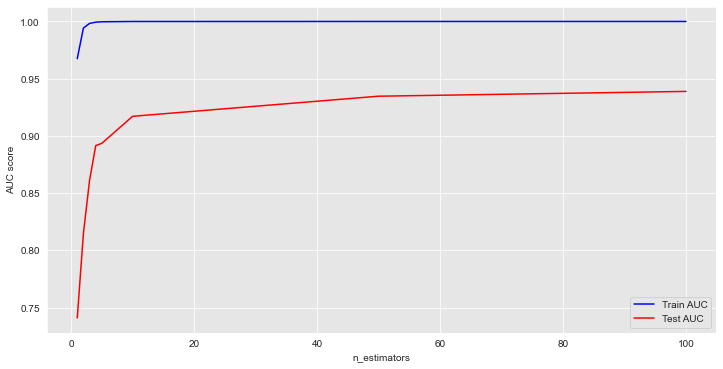

In [164]:
n_estimators=[1,2,3,4,5,10,50,100]
train_preds=[]
test_preds=[]
for n in n_estimators:
    forest = RandomForestClassifier(n_estimators=n)
    forest.fit(X_train_resampled,y_train_resampled)
    train_pred = forest.predict(X_train_resampled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_resampled,forest.predict_proba(X_train_resampled)[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_preds.append(roc_auc)
    test_pred = forest.predict(X_test_scaled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,forest.predict_proba(X_test_scaled)[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_preds.append(roc_auc)
plt.figure(figsize=(12,6))
plt.plot(n_estimators, train_preds, 'b', label='Train AUC')
plt.plot(n_estimators, test_preds, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.legend()
plt.show()

### Maximum Depth

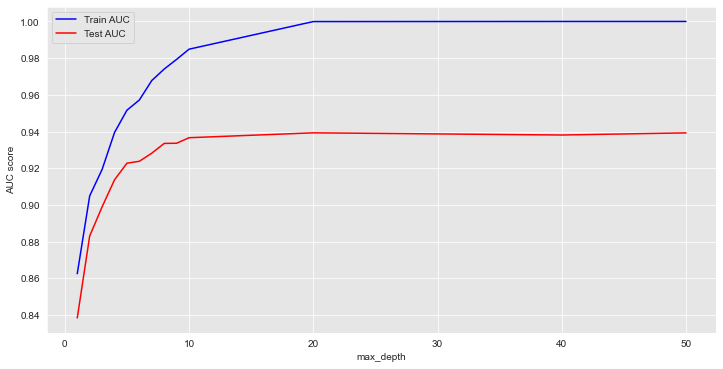

In [165]:
# Identify the optimal tree depth for given data
max_depth=[1,2,3,4,5,6,7,8,9,10,20,40,50]
train_preds=[]
test_preds=[]
for n in max_depth:
    forest = RandomForestClassifier(max_depth=n)
    forest.fit(X_train_resampled,y_train_resampled)
    train_pred = forest.predict(X_train_resampled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_resampled,forest.predict_proba(X_train_resampled)[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_preds.append(roc_auc)
    test_pred = forest.predict(X_test_scaled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,forest.predict_proba(X_test_scaled)[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_preds.append(roc_auc)
plt.figure(figsize=(12,6))
plt.plot(max_depth, train_preds, 'b', label='Train AUC')
plt.plot(max_depth, test_preds, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('max_depth')
plt.legend()
plt.show()

In [166]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, max_depth=10)
forest.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=10, n_estimators=10)

In [167]:
# predicting train and test data
train_preds=forest.predict(X_train_resampled)
test_preds=forest.predict(X_test_scaled)

In [168]:
# Calculating precision score
print('Precision:%s'%(precision_score(y_test,test_preds)))

Precision:0.4590354445090064


In [169]:
confusion_matrix(y_test,test_preds)

array([[6372,  931],
       [ 145,  790]])

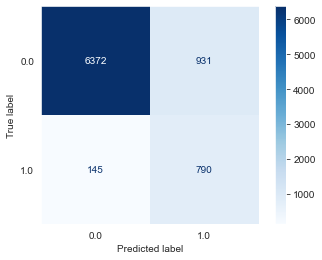

In [170]:
plot_confusion_matrix(forest, X_test_scaled, y_test,cmap = plt.cm.Blues)
plt.grid(False)

### Applying Grid Search

In [171]:
forest_parameters = {'n_estimators':[100],
                     'max_depth':[5,10]}

In [172]:
grid_clf = GridSearchCV(estimator=forest,param_grid=forest_parameters,scoring='accuracy',cv=3,n_jobs=1)
grid_clf.fit(X_train_resampled, y_train_resampled)

best_parameters = grid_clf.best_params_
best_parameters

{'max_depth': 10, 'n_estimators': 100}

Lets apply our best parameter value to build final model

In [173]:
# Instantiate RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, 
                                max_depth=10)

# Fit RandomForestClassifier

forest.fit(X_train_resampled,y_train_resampled)
# Predict on training and test sets
training_preds = forest.predict(X_train_resampled)
test_preds = forest.predict(X_test_scaled)

# Precision of training and test sets
training_precision = precision_score(y_train_resampled,training_preds)
test_precision = precision_score(y_test,test_preds)

print('Training Precision: {:.4}%'.format(training_precision * 100))
print('Validation Precision: {:.4}%'.format(test_precision * 100))

Training Precision: 90.42%
Validation Precision: 47.92%


In [174]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

         0.0       0.98      0.88      0.93      7303
         1.0       0.48      0.85      0.61       935

    accuracy                           0.88      8238
   macro avg       0.73      0.87      0.77      8238
weighted avg       0.92      0.88      0.89      8238



In [175]:
forest.score(X_test_scaled, y_test)

0.8781257586792911

In [176]:
confusion_matrix(y_test,test_preds)

array([[6441,  862],
       [ 142,  793]])

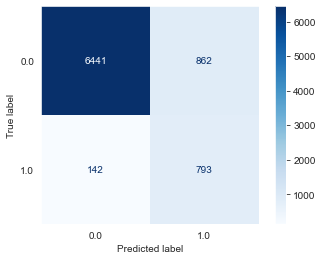

In [177]:
plot_confusion_matrix(forest, X_test_scaled, y_test,cmap = plt.cm.Blues)
plt.grid(False)

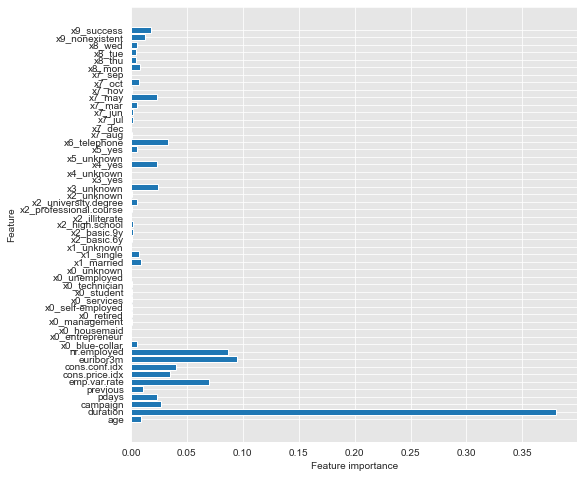

In [178]:
plot_feature_importances(forest)

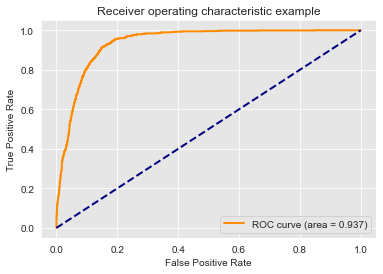

In [179]:
roc_curves(forest)

## Comparison of Accuracy and confusion matrix for all model

In [180]:
models = []
model1 = LogisticRegression(C=0.2)
models.append(model1)
model2 = DecisionTreeClassifier(criterion='gini',
                                max_depth=7,
                                min_samples_leaf=4,
                                min_samples_split=6,
                                max_features=15,
                                random_state=42)
models.append(model2)
model3 = XGBClassifier(learning_rate=0.1,
                       max_depth=6,
                       min_child_weight=3,
                       n_estimators=100,
                       subsample=0.2, 
                       random_state=42)
models.append(model3)
model4 = RandomForestClassifier(n_estimators=100, 
                                max_depth=10)
models.append(model4)

for n in models:
    n.fit(X_train_resampled,y_train_resampled)
    train_preds = n.predict(X_train_resampled)
    test_preds = n.predict(X_test_scaled)
    acc=accuracy_score(y_test, test_preds)
    conf=confusion_matrix(y_test, test_preds)
    print('Classification Report of %s :%s' %(n,classification_report(y_test, test_preds)), '\n', 'Confusion Matrix of %s :%s' %(n,confusion_matrix(y_test,test_preds)))

Classification Report of LogisticRegression(C=0.2) :              precision    recall  f1-score   support

         0.0       0.98      0.86      0.92      7303
         1.0       0.45      0.88      0.59       935

    accuracy                           0.86      8238
   macro avg       0.72      0.87      0.76      8238
weighted avg       0.92      0.86      0.88      8238
 
 Confusion Matrix of LogisticRegression(C=0.2) :[[6300 1003]
 [ 115  820]]
Classification Report of DecisionTreeClassifier(max_depth=7, max_features=15, min_samples_leaf=4,
                       min_samples_split=6, random_state=42) :              precision    recall  f1-score   support

         0.0       0.98      0.85      0.91      7303
         1.0       0.42      0.84      0.55       935

    accuracy                           0.85      8238
   macro avg       0.70      0.84      0.73      8238
weighted avg       0.91      0.85      0.87      8238
 
 Confusion Matrix of DecisionTreeClassifier(max_depth=7, 

### Decision Tree

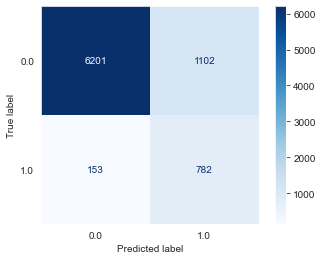

In [181]:
plot_confusion_matrix(model2, X_test_scaled, y_test,cmap = plt.cm.Blues)
plt.grid(False)

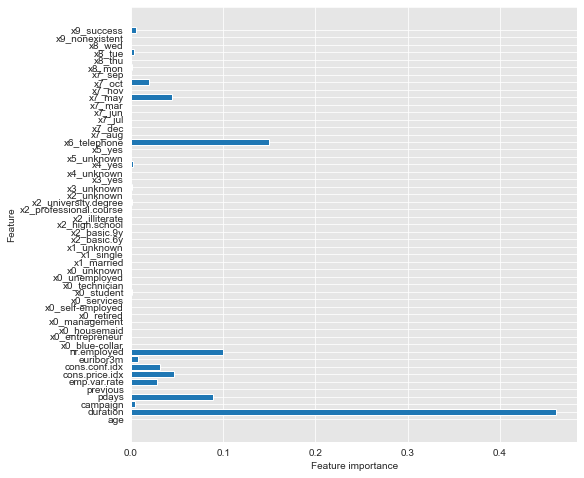

In [182]:
plot_feature_importances(model2)

### XG Boost Model

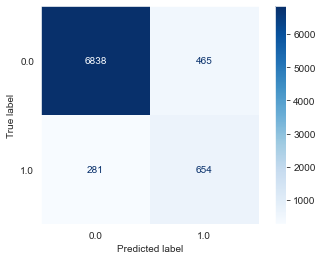

In [183]:
plot_confusion_matrix(model3, X_test_scaled, y_test,cmap = plt.cm.Blues)
plt.grid(False)

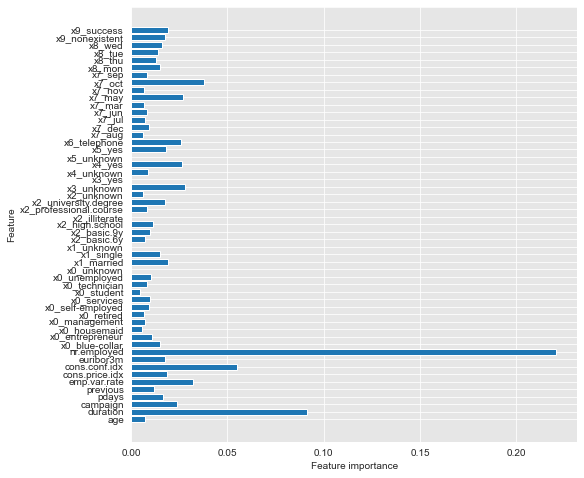

In [184]:
plot_feature_importances(model3)

### Random Forest

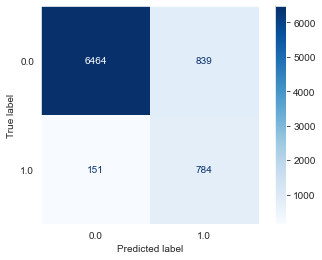

In [185]:
plot_confusion_matrix(model4, X_test_scaled, y_test,cmap = plt.cm.Blues)
plt.grid(False)

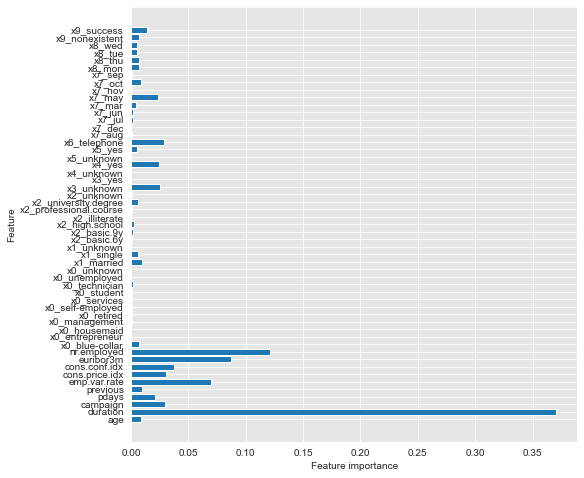

In [186]:
plot_feature_importances(model4)

In [187]:
importances = model2.feature_importances_

feature_list = list(X_train.columns)

feature_results = pd.DataFrame({'feature': feature_list,
                               'importance': importances})

feature_results

,feature,importance
0,age,0.000177
1,duration,0.461108
2,campaign,0.004559
3,pdays,0.089353
4,previous,0.000087
5,emp.var.rate,0.028738
6,cons.price.idx,0.046765
7,cons.conf.idx,0.030987
8,euribor3m,0.007301
9,nr.employed,0.099374


In [188]:
importances = model3.feature_importances_

feature_list = list(X_train.columns)

feature_results = pd.DataFrame({'feature': feature_list,
                               'importance': importances})

feature_results

,feature,importance
0,age,0.007099
1,duration,0.091609
2,campaign,0.024051
3,pdays,0.016634
4,previous,0.012078
5,emp.var.rate,0.032002
6,cons.price.idx,0.018493
7,cons.conf.idx,0.055212
8,euribor3m,0.017668
9,nr.employed,0.220626


In [189]:
importances = model4.feature_importances_

feature_list = list(X_train.columns)

feature_results = pd.DataFrame({'feature': feature_list,
                               'importance': importances})

feature_results

,feature,importance
0,age,0.008644
1,duration,0.370470
2,campaign,0.029348
3,pdays,0.020962
4,previous,0.009233
5,emp.var.rate,0.069487
6,cons.price.idx,0.030754
7,cons.conf.idx,0.037087
8,euribor3m,0.086931
9,nr.employed,0.120879


## Interpret


- Among our four models, Logistic regression, XGBoost, Decision Tree and Random Forest XGBoost has a precision value of 60% after applying resampling technique.

- It is important to reduce the number of false positive number, as the customer who have not deposited is falsely predicted as deposited. 

- In XGBoost model, the false positive number is less when compared to the other model. But couldn't meet the business requirement of reducing the positive numbers. 

## Conclusion

From our overall analysis, XGBoost model performance bettter than the other model with the precision score of 60%.

## Next Step

- Futhure work would be on reducing the false negative cases  also and try other models to improve the performance.
- Total actual deposit made by the customers were just 11% from the overall customers. Hence more analyis is needed to check how many people deposited without conducting campaign to check if the campaign is beneficial to the bank.